In [237]:
import pandas as pd
from jdatetime import datetime, date
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import arabic_reshaper
from bidi.algorithm import get_display
import scipy.stats as st

In [238]:
df = pd.read_csv('out.csv')
df = df.drop_duplicates()
display(df)
display(df.info())

DateReserve RestaurantName RestaurantType    Meal  \
0      1402-10-10       ابوریحان      daneshgah  dinner   
1      1402-10-10       ابوریحان      daneshgah  dinner   
2      1402-10-10       ابوریحان      daneshgah  dinner   
3      1402-10-10       ابوریحان      daneshgah  dinner   
4      1402-10-10       ابوریحان      daneshgah   lunch   
...           ...            ...            ...     ...   
15963  1402-12-09        کشاورزی        khabgah  dinner   
15964  1402-12-09            کوی        khabgah  dinner   
15965  1402-12-09            کوی        khabgah  dinner   
15966  1402-12-09            کوی        khabgah   lunch   
15967  1402-12-09            کوی        khabgah   lunch   

                      FoodName FoodType Gender  ReceiveWithCard  \
0                 خوراک نودلیت   khorak    man               14   
1                 خوراک نودلیت   khorak  woman               30   
2               چلوكباب كوبیده  berenji    man              139   
3               چلوكباب كوبیده  berenji  woman               68   
4                  خوراک فلافل   khorak    man               46   
...                        ...      ...    ...              ...   
15963     خوراک سالاد ماكاروني   khorak  woman               73   
15964        خوراک كشك بادمجان   khorak    man              158   
15965  چلو خورش قیمه سیب زمینی  berenji    man              859   
15966          خوراک کوکو سبزی   khorak    man               80   
15967            زرشك پلوبامرغ  berenji    man              826   

       ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
0                    0            0           14          1   
1                    3            3           36          1   
2                    0            0          139          1   
3                   17            4           89          1   
4                    0            0           46          1   
...                ...          ...          ...        ...   
15963                7            8           88          4   
15964               10           23          191          4   
15965               47           91          997          4   
15966                7           10           97          4   
15967               58           79          963          4   

       HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   
...                   ...                     ...                     ...   
15963                   1                       0                       0   
15964                   1                       0                       0   
15965                   1                       0                       0   
15966                   1                       0                       0   
15967                   1                       0                       0   

       NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
0                 42             56                 14                 89   
1                 42             56                 14                 89   
2                 42             56                 14                 89   
3                 42             56                 14                 89   
4                 42             56                 14                 89   
...              ...            ...                ...                ...   
15963             20             21                  3                 17   
15964             20             21                  3                 17   
15965             20             21                  3                 17   
15966             20             21     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13085 entries, 0 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateReserve             13085 non-null  object
 1   RestaurantName          13085 non-null  object
 2   RestaurantType          13085 non-null  object
 3   Meal                    13085 non-null  object
 4   FoodName                13085 non-null  object
 5   FoodType                13085 non-null  object
 6   Gender                  13085 non-null  object
 7   ReceiveWithCard         13085 non-null  int64 
 8   ReceiveWithCode         13085 non-null  int64 
 9   DontReceive             13085 non-null  int64 
 10  Reservation             13085 non-null  int64 
 11  DayOfWeek               13085 non-null  int64 
 12  HolidayInWeekCount      13085 non-null  int64 
 13  HolidayInPrevWeekCount  13085 non-null  int64 
 14  HolidayInNextWeekCount  13085 non-null  int64 
 15  Ne

None

In [239]:
df = df[df['RestaurantName'].str.contains('حوزه') == False]

# Compare DayOfWeek

In [240]:
df[df['DayOfWeek'] == 6]

DateReserve RestaurantName RestaurantType    Meal  \
1931   1402-10-29       ابوریحان      daneshgah   lunch   
1932   1402-10-29       ابوریحان      daneshgah   lunch   
1933   1402-10-29      ساختمان 6        khabgah   lunch   
1934   1402-10-29      ساختمان 6        khabgah   lunch   
1935   1402-10-29  ساختمان 71و72        khabgah   lunch   
...           ...            ...            ...     ...   
15406  1402-12-25         فاطمیه        khabgah  dinner   
15407  1402-12-25          چمران        khabgah  dinner   
15408  1402-12-25          چمران        khabgah  dinner   
15409  1402-12-25            کوی        khabgah  dinner   
15410  1402-12-25            کوی        khabgah  dinner   

                     FoodName FoodType Gender  ReceiveWithCard  \
1931   عدس پلو با گوشت و كشمش  berenji    man               61   
1932   عدس پلو با گوشت و كشمش  berenji  woman               56   
1933        خوراک سالاد الویه   khorak    man              366   
1934   عدس پلو با گوشت و كشمش  berenji    man              294   
1935        خوراک سالاد الویه   khorak  woman              416   
...                       ...      ...    ...              ...   
15406            چلوجوجه كباب  berenji  woman               88   
15407       خوراک كشك بادمجان   khorak  woman                5   
15408            چلوجوجه كباب  berenji  woman               19   
15409       خوراک كشك بادمجان   khorak    man               16   
15410            چلوجوجه كباب  berenji    man              293   

       ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
1931                11            6           78          6   
1932                 7           10           73          6   
1933                22           20          408          6   
1934                18           23          335          6   
1935                39           18          473          6   
...                ...          ...          ...        ...   
15406                9           30          127          6   
15407                1            2            8          6   
15408               10           35           64          6   
15409                3            6           25          6   
15410               26           73          392          6   

       HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
1931                    0                       0                       0   
1932                    0                       0                       0   
1933                    0                       0                       0   
1934                    0                       0                       0   
1935                    0                       0                       0   
...                   ...                     ...                     ...   
15406                   0                       0                       2   
15407                   0                       0                       2   
15408                   0                       0                       2   
15409                   0                       0                       2   
15410                   0                       0                       2   

       NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
1931              23             37                 33                108   
1932              23             37                 33                108   
1933              23             37                 33                108   
1934              23             37                 33                108   
1935              23             37                 33                108   
...              ...            ...                ...                ...   
15406              4              5                 19                 33   
15407              4              5                 19                 33   
15408              4              5                 19                 33   
15409              4              5                 

In [241]:
df[df['DateReserve']=='1402-12-25']['Reservation'].sum()

1318

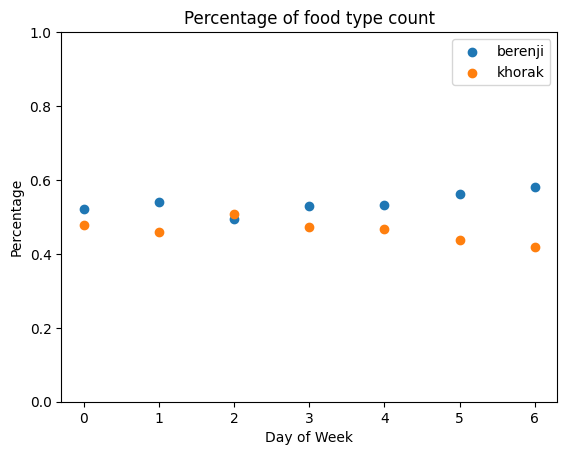

In [242]:
b = df[df['FoodType'] == 'berenji'].groupby('DayOfWeek').count()['FoodType']
k = df[df['FoodType'] == 'khorak'].groupby('DayOfWeek').count()['FoodType']
plt.scatter(b.index, b/(k+b), label='berenji')
plt.scatter(b.index, k/(k+b), label='khorak')
plt.xticks(np.arange(0,7,1))
plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Percentage of food type count')
    
plt.legend()

/tmp/ipykernel_25858/827528944.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/827528944.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



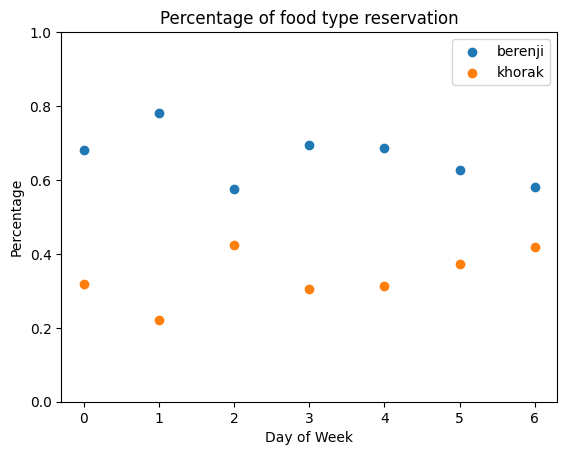

In [243]:
b = df[df['FoodType'] == 'berenji'].groupby('DayOfWeek').sum()['Reservation']
k = df[df['FoodType'] == 'khorak'].groupby('DayOfWeek').sum()['Reservation']
plt.scatter(b.index, b/(k+b), label='berenji')
plt.scatter(b.index, k/(k+b), label='khorak')
plt.xticks(np.arange(0,7,1))
plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Percentage of food type reservation')
    
plt.legend()

فاصله غذا های برنجی در سفارش بچه ها بیشتر از عرضه است

/tmp/ipykernel_25858/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defaul

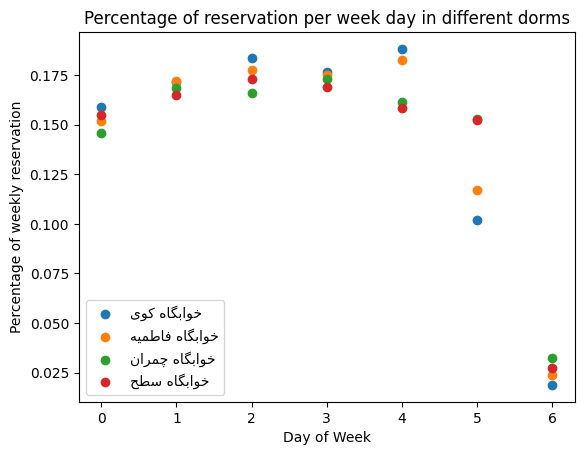

In [244]:
for i in ['کوی', 'فاطمیه', 'چمران', 'سطح']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.scatter(b.index, b['Reservation']/ b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('خوابگاه '+i)))
plt.xticks(np.arange(0,7,1))
# plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different dorms')
    
plt.legend()

دانشجویان کارشناسی در دروز پنجشنبه بیشتر در خوابگاه هستند نسبت که ارشد

/tmp/ipykernel_25858/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



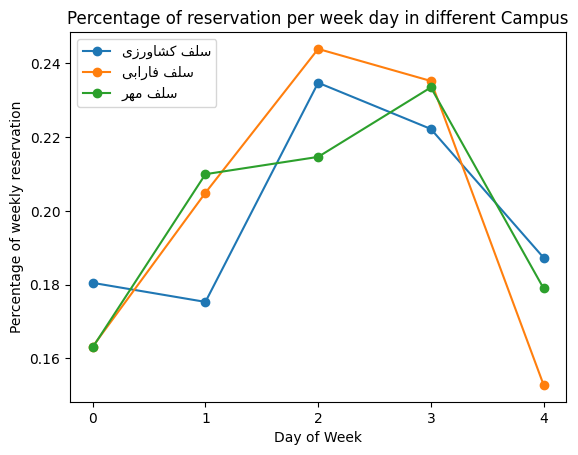

In [245]:
for i in ['کشاورزی', 'فارابی', 'مهر']:
    b = df[(df['RestaurantName'].str.contains(i)) & (df['RestaurantName'].str.contains('خوابگاه') == False)]
    b = b[b['DayOfWeek'] < 5].groupby('DayOfWeek').sum()
    plt.plot(b.index, b['Reservation'] / b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('سلف ' + i)), marker='o')
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different Campus')
    
plt.legend()

شلوغ ترین روز هفته در پردیس مرکزی و فارابی سه شنبه است و در کشاورزی دوشنبه و همچنین روز یکشنبه دانشکده کشاورزی برخلاف دو دانشکده دیگر خلوت است و روند هفتگش متفاوتی دارد

/tmp/ipykernel_25858/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



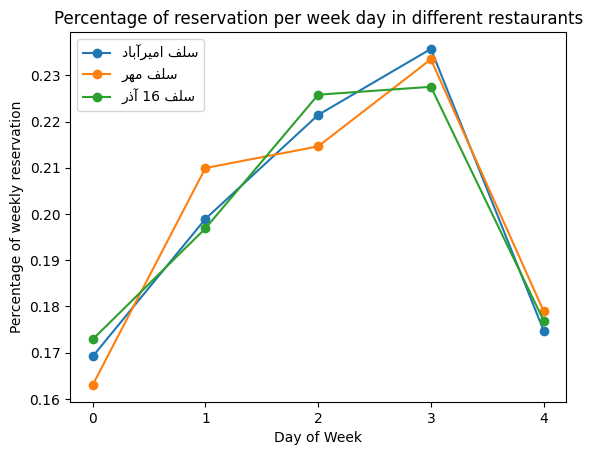

In [246]:
for i in ['امیرآباد', 'مهر', '16 آذر']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.plot(b.index, b['Reservation'] / b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('سلف ' + i)), marker='o')
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different restaurants')
    
plt.legend()

In [319]:
df['DontReceive'].sum()

162429

In [326]:
df['DontReceive'].sum() * 300 / 1000

48728.7

In [318]:
df['DontReceive'].sum() / df['Reservation'].sum()

0.08047218433559629

/tmp/ipykernel_25858/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_25858/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



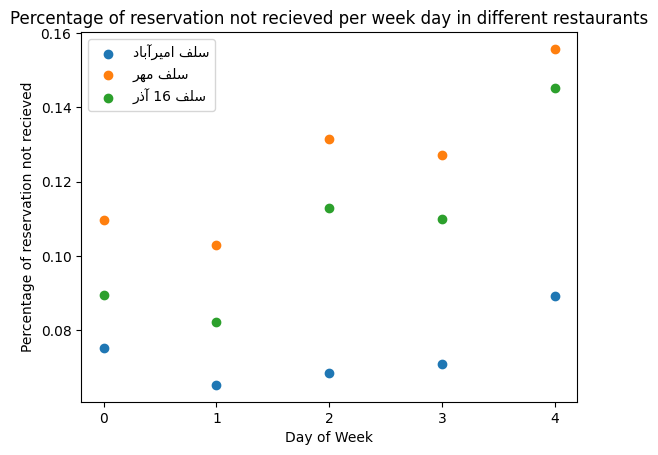

In [247]:
for i in ['امیرآباد', 'مهر', '16 آذر']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.scatter(b.index, b['DontReceive']/b['Reservation'], label=get_display(arabic_reshaper.reshape('سلف '+i)))
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of reservation not recieved')
plt.title('Percentage of reservation not recieved per week day in different restaurants')
    
plt.legend()

دانشجویان فنی بالا نسبت به ۲ سلف دیگر به میزان کمتری هدر رفت غذا دارند و تعهد بالاتری به گرفتن غذای خود دارند همچنین عدم دریافت غذا در روز چهارشنبه بیشتر میزان را دارد

# Compare DontReceiveRate and T-test

In [134]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [303]:
def plot_box(plot_var, axis='x'):
    grouped = df.groupby(['DateReserve', plot_var])
    tmp = grouped.agg({
        'ReceiveWithCard': 'sum',
        'ReceiveWithCode': 'sum',
        'DontReceive': 'sum',
        'Reservation': 'sum'
    }).reset_index()
    tmp['DontReceiveRate'] = tmp['DontReceive']/tmp['Reservation']
    fig = go.Figure()

    for i in tmp[plot_var].unique():
        if axis == 'x':
            fig.add_box(x=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))
        else:
            fig.add_box(y=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))


    if axis == 'x':    
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title="DontReceiveRate",
            yaxis_title=plot_var,
        )
    else:
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title=plot_var,
            yaxis_title="DontReceiveRate",
        )
    fig.show()
    return tmp

In [332]:
_ = plot_box('RestaurantName','y')

$$
H_0: Rate_\text{man} - Rate_\text{woman} = 0\\
H_A: Rate_\text{man} - Rate_\text{woman} < 0
$$

In [261]:
tmp = plot_box('Gender')
_,p_value = st.ttest_ind(tmp[tmp['Gender'] == 'man']['DontReceiveRate'],
             tmp[tmp['Gender'] == 'woman']['DontReceiveRate'],
             alternative='less')
p_value

0.00019257963032806062

بنابراین میزان عدم دریافت در خانم ها بیشتر از آقایان است

$$
H_0: Rate_\text{week without holiday} - Rate_\text{week with holiday} = 0\\
H_A: Rate_\text{week without holiday} - Rate_\text{week with holiday} < 0\\
$$

In [314]:
for i in ['HolidayInPrevWeekCount', 'HolidayInWeekCount', 'HolidayInNextWeekCount']:
    tmp = plot_box(i)
    _,p_value = st.ttest_ind(tmp[tmp[i] == 0]['DontReceiveRate'],
                 tmp[tmp[i] > 0]['DontReceiveRate'],
                 alternative='less')
    print(i, p_value)

HolidayInPrevWeekCount 0.6598934415351067


HolidayInWeekCount 0.0015523417383000878


HolidayInNextWeekCount 0.0009247972191649749


تعداد تعطیلی های هفته همانطور که انتظار می رفت موثر است
همچنین تعطیلی های هفته بعد روی عدم دریافت موثر است ولی هفته گذشته با ضریب اطمینان بالایی تاثیر ندارد

$$
H_0: Rate_\text{dinner} - Rate_\text{lunch} = 0\\
H_A: Rate_\text{dinner} - Rate_\text{lunch} < 0\\
$$

In [295]:
tmp = plot_box('Meal')
_,p_value = st.ttest_ind(tmp[tmp['Meal'] == 'dinner']['DontReceiveRate'],
             tmp[tmp['Meal'] == 'lunch']['DontReceiveRate'],
             alternative='less')
p_value

0.14423202264261992

$$
H_0: Rate_\text{berenji} - Rate_\text{khorak} = 0\\
H_A: Rate_\text{berenji} - Rate_\text{khorak} < 0\\
$$

ناهار یا شام بودن وعده غذایی تاثیری روی میزان عدم دریافت ندارد

In [306]:
tmp = plot_box('FoodType')
_,p_value = st.ttest_ind(tmp[tmp['FoodType'] == 'berenji']['DontReceiveRate'],
             tmp[tmp['FoodType'] == 'khorak']['DontReceiveRate'],
             alternative='less')
p_value

0.14303169224349924

نوع غذا تاثیری ندارد

In [317]:
for i in ['NextHoliday_1', 'NextHoliday_2', 'PreviousHoliday_1', 'PreviousHoliday_2']:
    tmp = plot_box(i)
    _,p_value = st.ttest_ind(tmp[~((0 <= tmp[i]) & (tmp[i] <= 5))]['DontReceiveRate'],
                 tmp[((0 <= tmp[i]) & (tmp[i] <= 5))]['DontReceiveRate'],
                 alternative='less')
    print(i, p_value)

NextHoliday_1 3.213299427380918e-05


NextHoliday_2 0.017637863114562804


PreviousHoliday_1 0.1364587311790588


PreviousHoliday_2 0.016988438479914443


In [137]:
df[df['RestaurantName'].str.contains("امیرآباد")].groupby('DateReserve').agg({
    'DayOfWeek': 'min',
    'Reservation': 'sum',
    'ReceiveWithCard': 'sum',
    'ReceiveWithCode': 'sum',
    'DontReceive': 'sum'
})

DayOfWeek  Reservation  ReceiveWithCard  ReceiveWithCode  \
DateReserve                                                             
1402-09-01           4         1507             1173              247   
1402-09-04           0         1560             1290              191   
1402-09-05           1         2078             1737              260   
1402-09-06           2         1863             1534              237   
1402-09-07           3         1968             1627              242   
...                ...          ...              ...              ...   
1403-02-26           4         1346             1015              224   
1403-02-29           0         1360             1108              158   
1403-02-30           1         1799             1486              217   
1403-02-31           2         1707             1379              207   
1403-03-01           3         1854             1466              235   

             DontReceive  
DateReserve               
1402-09-01            87  
1402-09-04            79  
1402-09-05            81  
1402-09-06            92  
1402-09-07            99  
...                  ...  
1403-02-26           107  
1403-02-29            94  
1403-02-30            96  
1403-02-31           121  
1403-03-01           153  

[99 rows x 5 columns]

In [139]:
for i in ['Meal', 'FoodName', 'Gender', 'FoodType', 'RestaurantName']:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9696 entries, 1 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DateReserve             9696 non-null   object  
 1   RestaurantName          9696 non-null   category
 2   RestaurantType          9696 non-null   object  
 3   Meal                    9696 non-null   category
 4   FoodName                9696 non-null   category
 5   FoodType                9696 non-null   category
 6   Gender                  9696 non-null   category
 7   ReceiveWithCard         9696 non-null   int64   
 8   ReceiveWithCode         9696 non-null   int64   
 9   DontReceive             9696 non-null   int64   
 10  Reservation             9696 non-null   int64   
 11  DayOfWeek               9696 non-null   int64   
 12  HolidayInWeekCount      9696 non-null   int64   
 13  HolidayInPrevWeekCount  9696 non-null   int64   
 14  HolidayInNextWeekCount 

/tmp/ipykernel_25858/2924985136.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



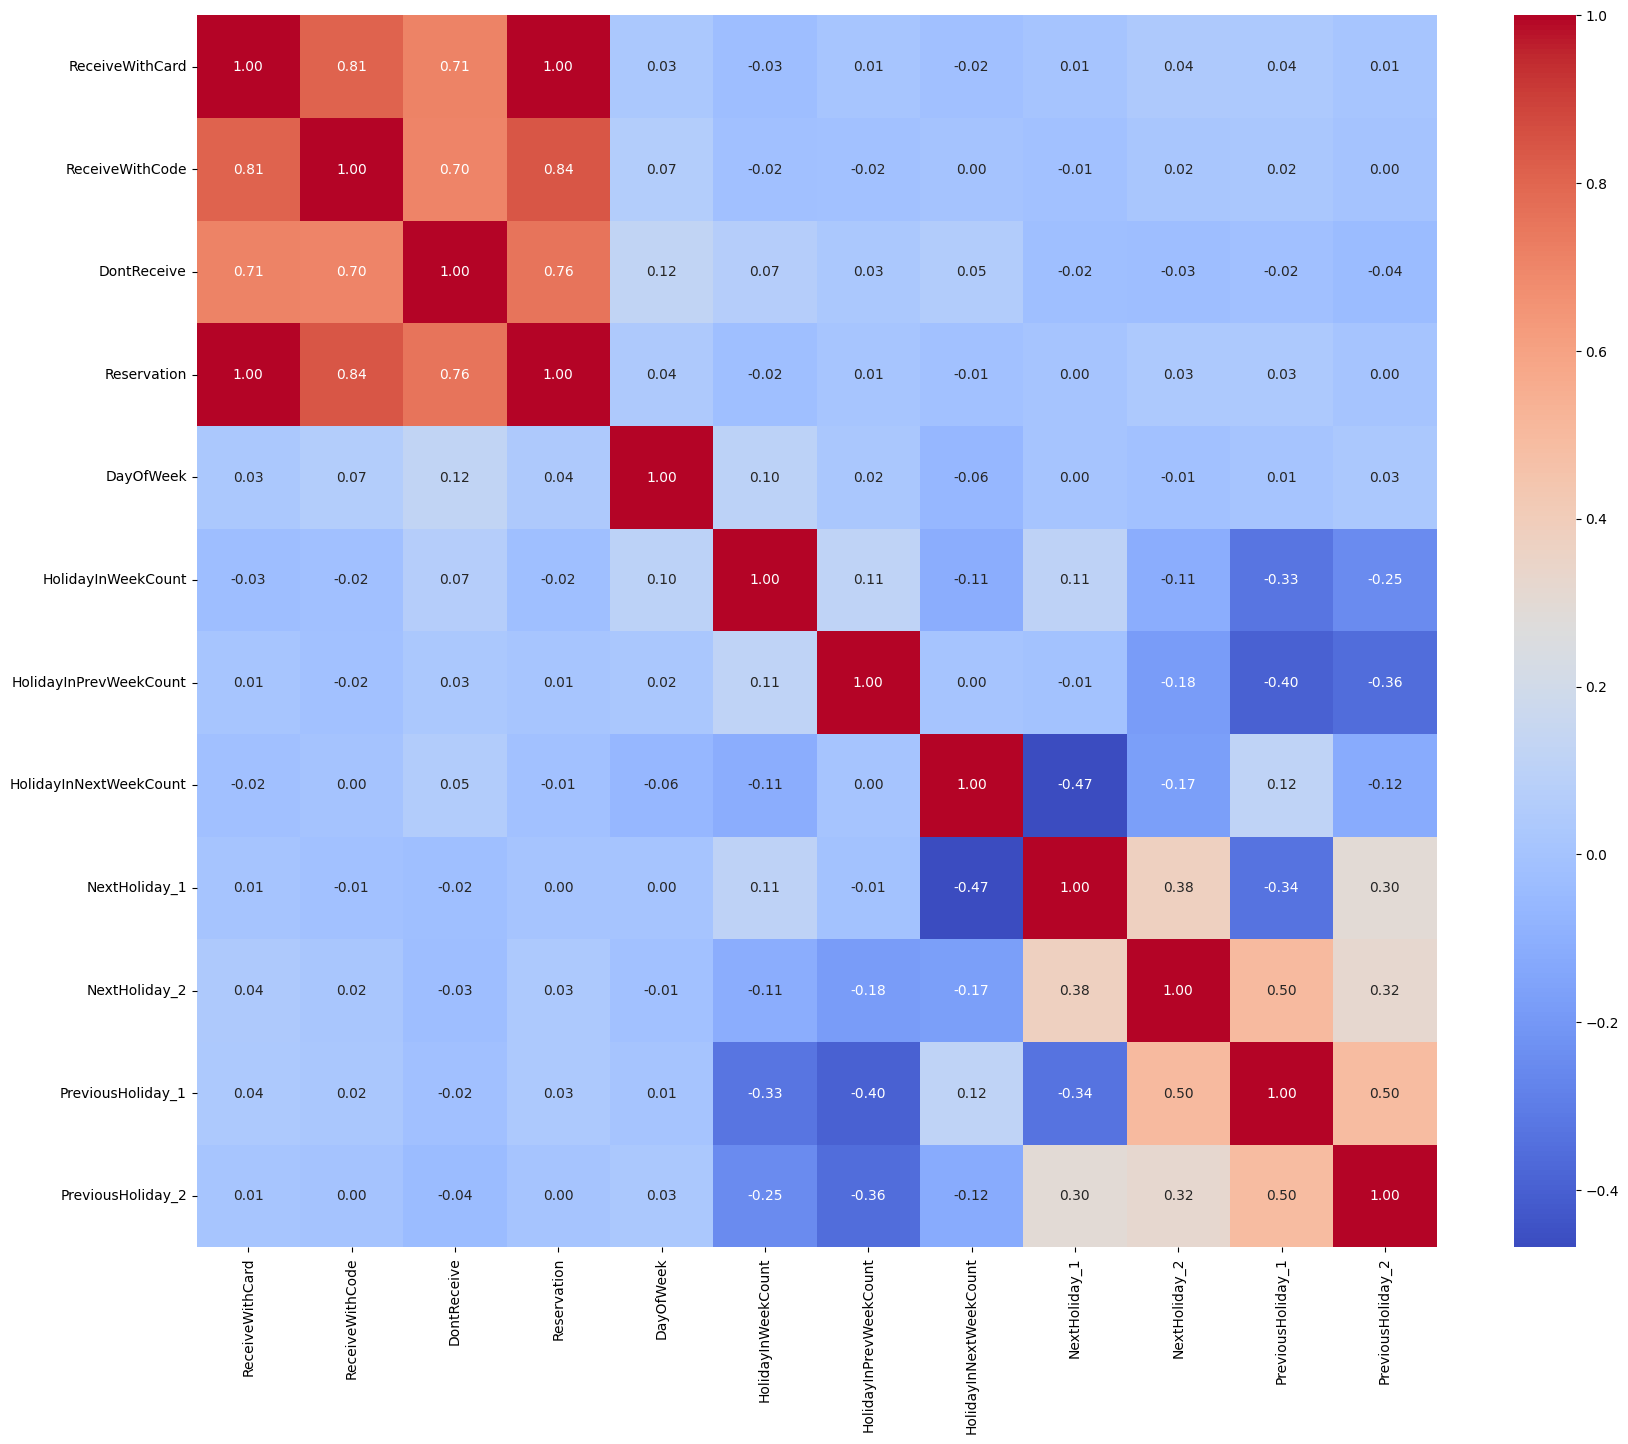

In [140]:
corr = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

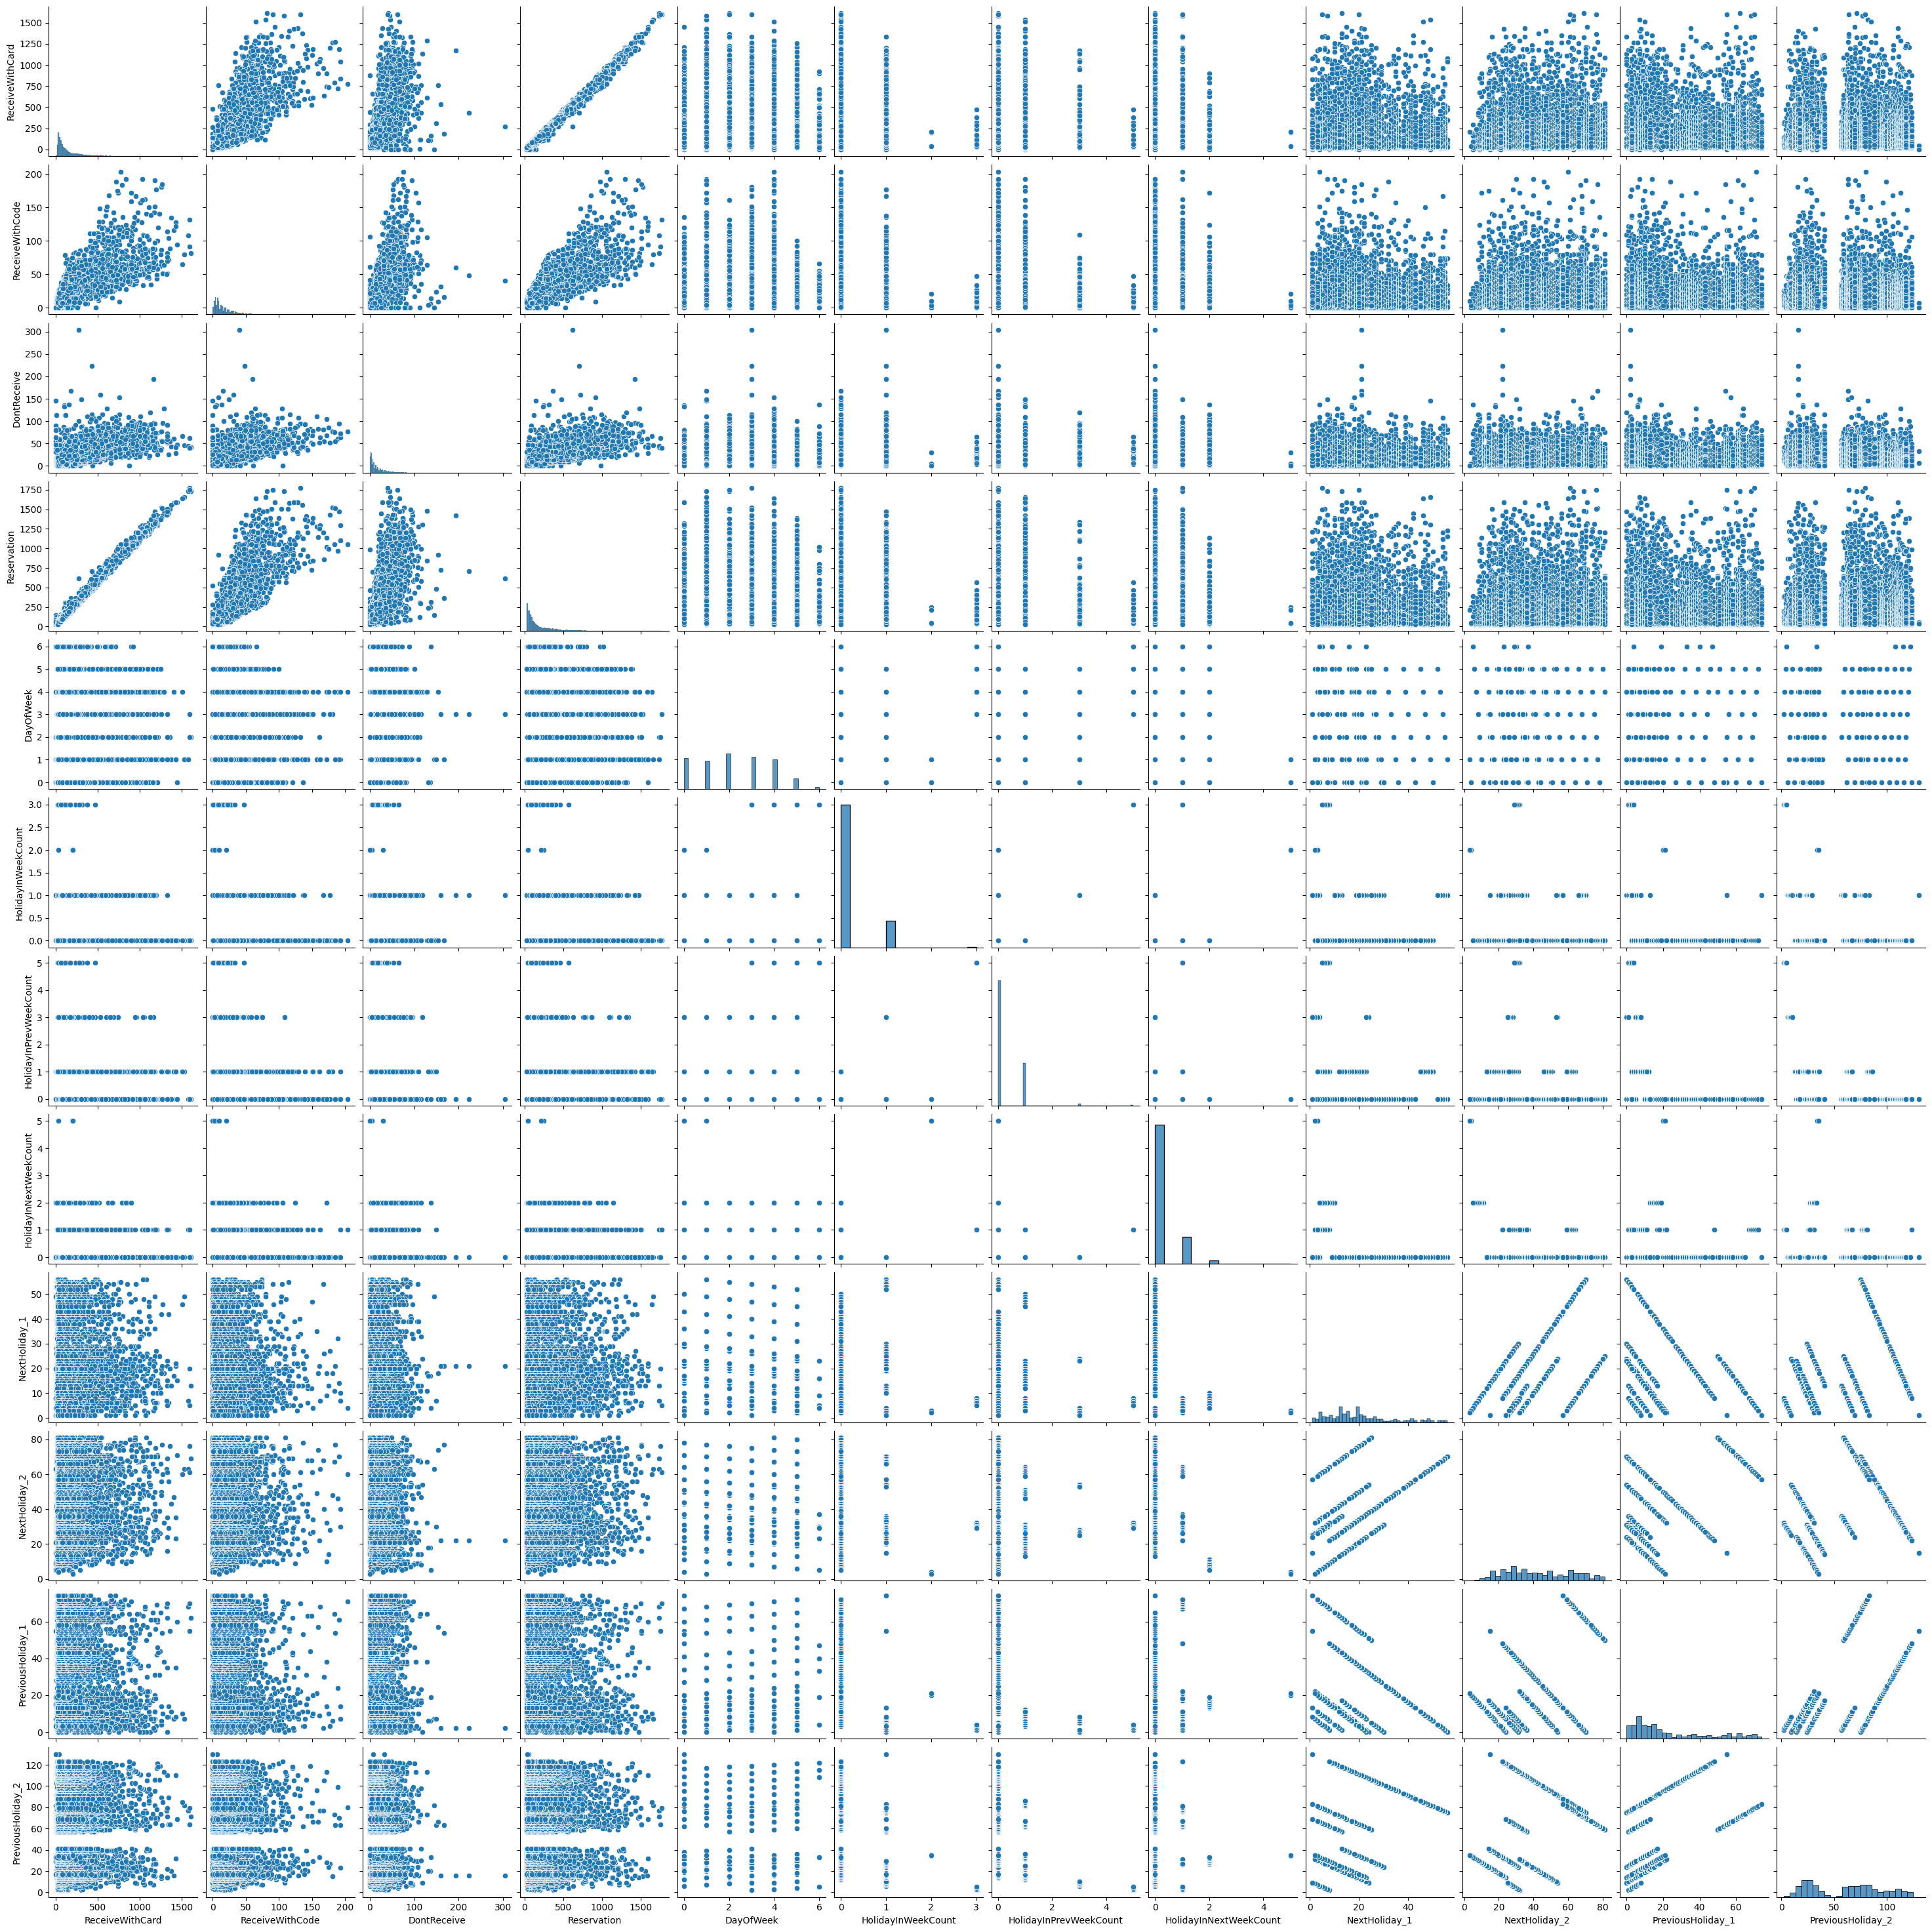

In [141]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9696 entries, 1 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DateReserve             9696 non-null   object  
 1   RestaurantName          9696 non-null   category
 2   RestaurantType          9696 non-null   object  
 3   Meal                    9696 non-null   category
 4   FoodName                9696 non-null   category
 5   FoodType                9696 non-null   category
 6   Gender                  9696 non-null   category
 7   ReceiveWithCard         9696 non-null   int64   
 8   ReceiveWithCode         9696 non-null   int64   
 9   DontReceive             9696 non-null   int64   
 10  Reservation             9696 non-null   int64   
 11  DayOfWeek               9696 non-null   int64   
 12  HolidayInWeekCount      9696 non-null   int64   
 13  HolidayInPrevWeekCount  9696 non-null   int64   
 14  HolidayInNextWeekCount 

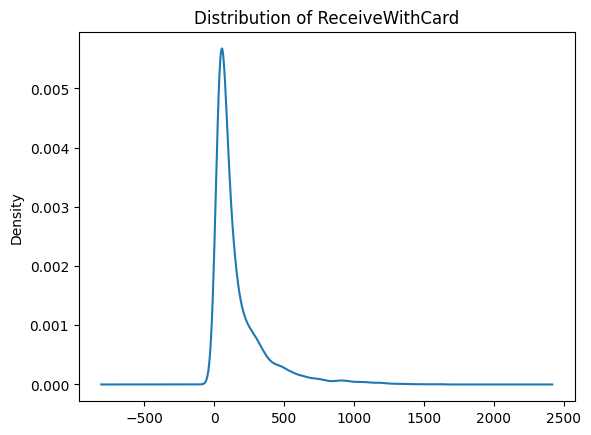

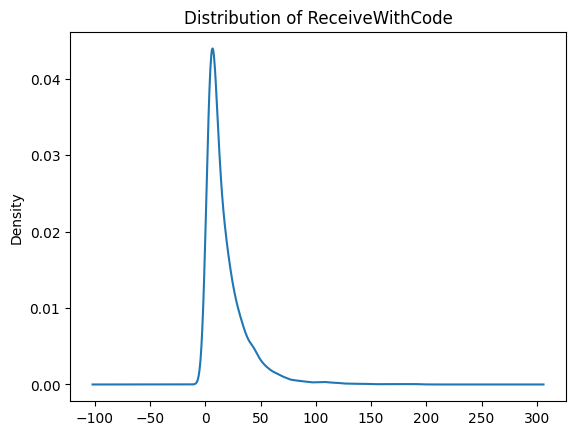

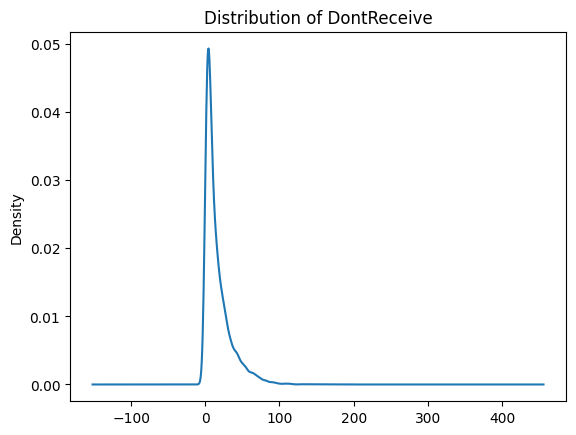

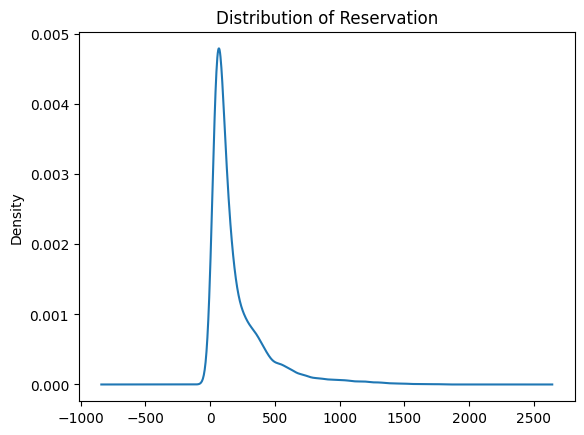

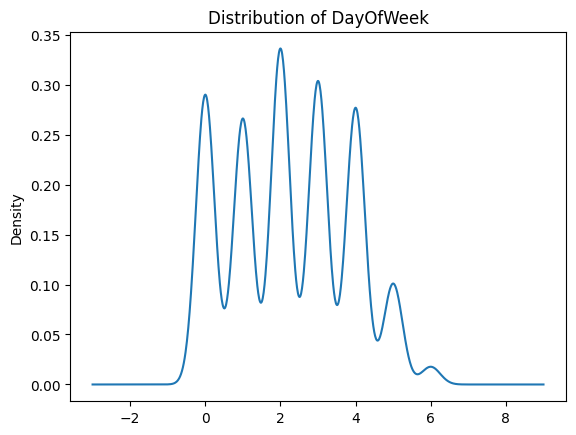

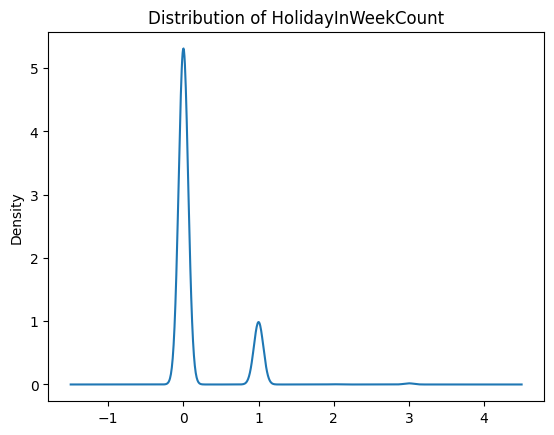

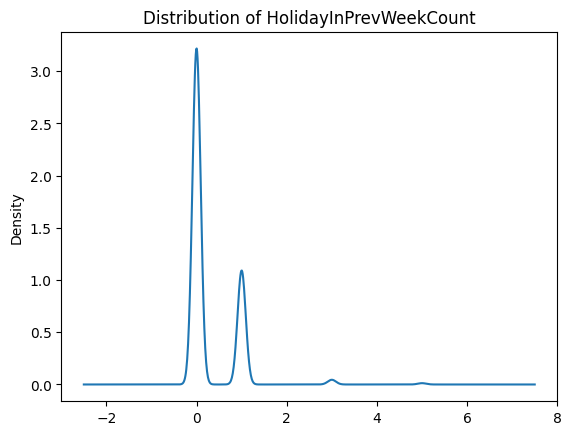

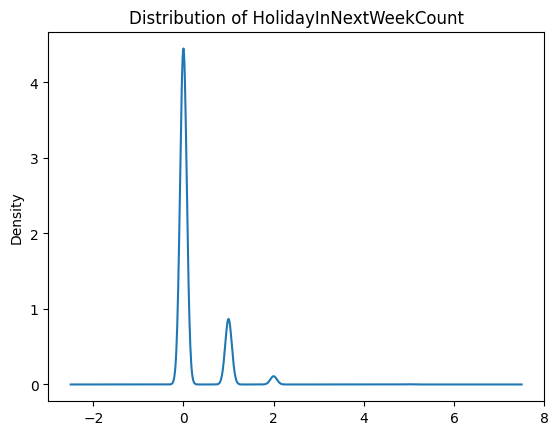

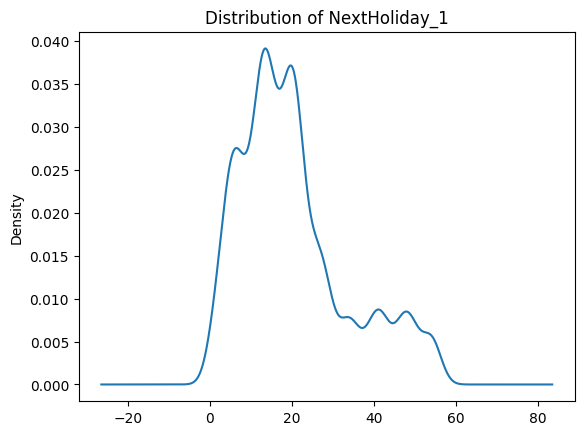

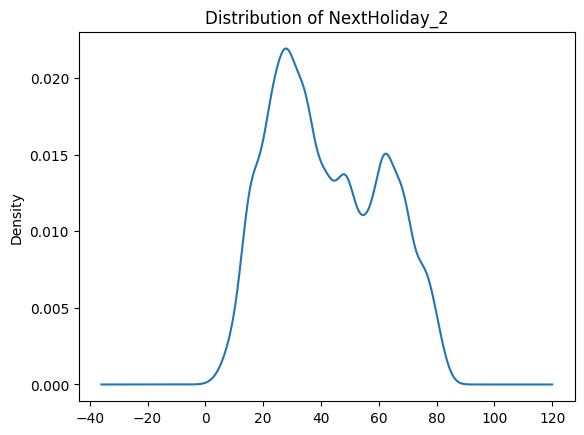

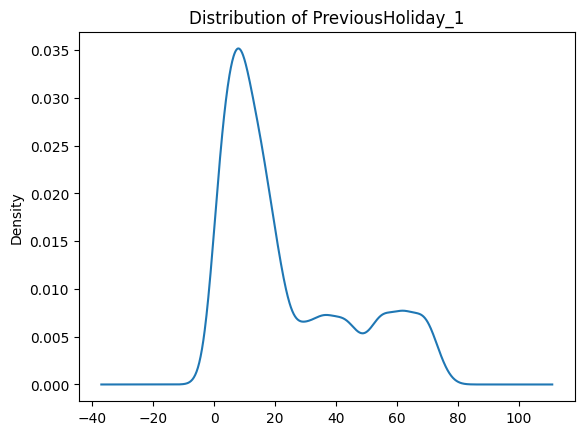

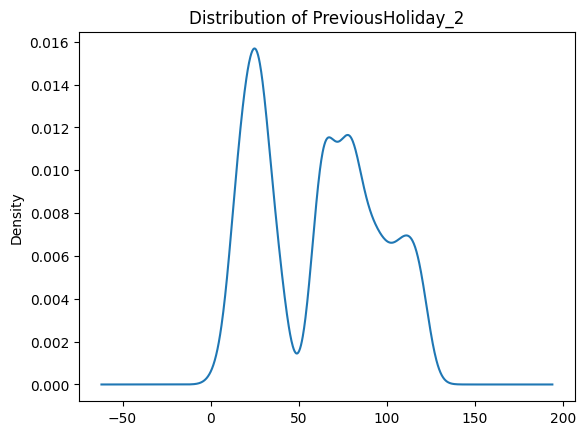

<Figure size 640x480 with 0 Axes>

In [146]:
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column].plot(kind='kde', title=f'Distribution of {column}')
        plt.show()

plt.tight_layout()
plt.show()

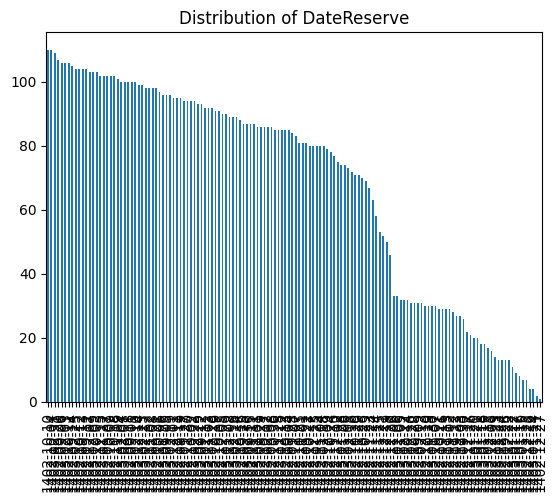

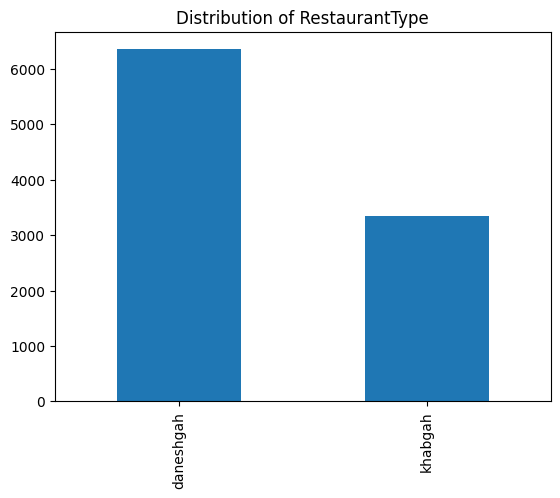

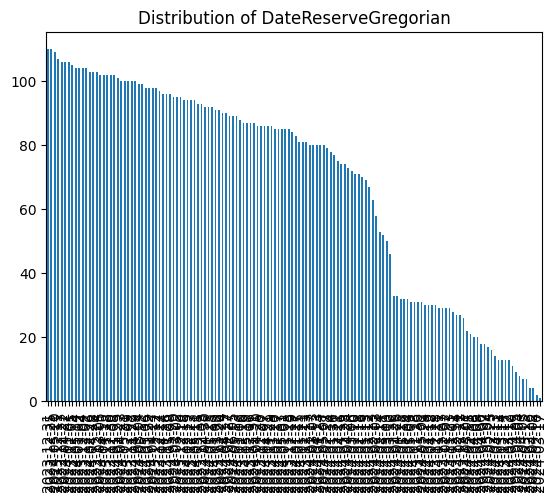

In [147]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
        plt.show()

# Find tops:


> Top 10  cooked food per day

In [148]:
top_10 = df.groupby('DateReserve')['Reservation'].sum().nlargest(10)
top_10
# Month: Azar - Midterms duration

DateReserve
1402-09-05    24094
1402-09-14    24036
1402-09-12    23886
1402-09-06    23885
1402-09-13    23686
1402-10-11    23096
1402-09-20    22947
1402-10-05    22820
1402-10-10    22782
1402-10-04    22728
Name: Reservation, dtype: int64

In [149]:
my_date = '1402-09-05'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'],ascending=False)

values_on_date


DateReserve         RestaurantName RestaurantType    Meal  \
10681  1402-09-05           فنی امیرآباد      daneshgah   lunch   
10677  1402-09-05             فنی 16 آذر      daneshgah   lunch   
10649  1402-09-05                سطح شهر        khabgah  dinner   
10733  1402-09-05                    کوی        khabgah   lunch   
10731  1402-09-05                    کوی        khabgah  dinner   
...           ...                    ...            ...     ...   
10719  1402-09-05                 کاسپین      daneshgah   lunch   
10721  1402-09-05                 کاسپین        khabgah  dinner   
10621  1402-09-05  الهیات و معارف اسلامی      daneshgah   lunch   
10613  1402-09-05               ابوریحان      daneshgah   lunch   
10688  1402-09-05                   فومن        khabgah  dinner   

                   FoodName FoodType Gender  ReceiveWithCard  ReceiveWithCode  \
10681          چلوجوجه كباب  berenji    man             1271              185   
10677          چلوجوجه كباب  berenji    man              956               73   
10649   چلو خورش قورمه سبزی  berenji    man              998               66   
10733          چلوجوجه كباب  berenji    man              924               46   
10731   چلو خورش قورمه سبزی  berenji    man              919               46   
...                     ...      ...    ...              ...              ...   
10719          چلوجوجه كباب  berenji  woman               41                4   
10721        خوراک ناگت مرغ   khorak  woman               41                1   
10621  خوراک سالاد ماكاروني   khorak  woman               40                4   
10613  خوراک سالاد ماكاروني   khorak  woman               31                8   
10688   چلو خورش قورمه سبزی  berenji  woman               35                2   

       DontReceive  Reservation  DayOfWeek  HolidayInWeekCount  \
10681           54         1510          1                   0   
10677           89         1118          1                   0   
10649           29         1093          1                   0   
10733           65         1035          1                   0   
10731           53         1018          1                   0   
...            ...          ...        ...                 ...   
10719            0           45          1                   0   
10721            2           44          1                   0   
10621            0           44          1                   0   
10613            2           41          1                   0   
10688            1           38          1                   0   

       HolidayInPrevWeekCount  HolidayInNextWeekCount  NextHoliday_1  \
10681                       0                       0             21   
10677                       0                       0             21   
10649                       0                       0             21   
10733                       0                       0             21   
10731                       0                       0             21   
...                       ...                     ...            ...   
10719                       0                       0             21   
10721                       0                       0             21   
10621                       0                       0             21   
10613                       0                       0             21   
10688                       0                       0             21   

       NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
10681             77                 54                 63   
10677             77                 54                 63   
10649             77                 54                 63   
10733             77                 54                 63   
10731             77                 54                 63   
...              ...                ...                ...   
10719             77                 54                 63   
10721             77                 54                 63   
10621       

In [150]:
my_date = '1402-09-14'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'],ascending=False)

values_on_date


DateReserve      RestaurantName RestaurantType    Meal  \
9009  1402-09-14             سطح شهر        khabgah  dinner   
9041  1402-09-14        فنی امیرآباد      daneshgah   lunch   
9094  1402-09-14                 کوی        khabgah  dinner   
9043  1402-09-14        فنی امیرآباد      daneshgah   lunch   
9037  1402-09-14          فنی 16 آذر      daneshgah   lunch   
...          ...                 ...            ...     ...   
9052  1402-09-14               فیزیک      daneshgah   lunch   
8976  1402-09-14            ابوریحان      daneshgah  dinner   
8990  1402-09-14  بیوشیمی و بیوفیزیک      daneshgah   lunch   
9077  1402-09-14           کارآفرینی      daneshgah   lunch   
9086  1402-09-14              کاسپین        khabgah  dinner   

                          FoodName FoodType Gender  ReceiveWithCard  \
9009             خوراک سالاد الویه   khorak    man             1040   
9041              باقلاپلو با گوشت  berenji    man              688   
9094  چلو خورش مسما بادمجان با مرغ  berenji    man              756   
9043                خوراک ناگت مرغ   khorak    man              523   
9037              باقلاپلو با گوشت  berenji    man              537   
...                            ...      ...    ...              ...   
9052              باقلاپلو با گوشت  berenji  woman               30   
8976  چلو خورش مسما بادمجان با مرغ  berenji  woman               34   
8990              باقلاپلو با گوشت  berenji  woman               29   
9077              باقلاپلو با گوشت  berenji    man               27   
9086  چلو خورش مسما بادمجان با مرغ  berenji  woman               33   

      ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
9009               81           38         1159          3   
9041              143           71          902          3   
9094               36           50          842          3   
9043              149           52          724          3   
9037               56           76          669          3   
...               ...          ...          ...        ...   
9052                4            8           42          3   
8976                4            1           39          3   
8990                5            3           37          3   
9077                1            9           37          3   
9086                1            2           36          3   

      HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
9009                   0                       0                       0   
9041                   0                       0                       0   
9094                   0                       0                       0   
9043                   0                       0                       0   
9037                   0                       0                       0   
...                  ...                     ...                     ...   
9052                   0                       0                       0   
8976                   0                       0                       0   
8990                   0                       0                       0   
9077                   0                       0                       0   
9086                   0                       0                       0   

      NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
9009             12             68                 63                 72   
9041             12             68                 63                 72   
9094             12             68                 63                 72   
9043             12             68                 63                 72   
9037             12             68                 63                 72   
...             ...            ...                ...                ...   
9052             12             68                 63                 72   
8976             12             68                 63                 72   
8990             12             68                 63

> Top 10 used codes per day

In [327]:
top_10 = (df.groupby('DateReserve')['ReceiveWithCode'].sum()/df.groupby('DateReserve')['Reservation'].sum()).nlargest(10)
top_10
# Month: Azar - Midterms duration

DateReserve
1402-12-20    0.122982
1402-10-20    0.122832
1402-11-14    0.122592
1402-12-16    0.122549
1402-11-25    0.121983
1402-11-24    0.117298
1402-12-02    0.116861
1403-02-05    0.115189
1402-12-21    0.114376
1402-09-15    0.111975
dtype: float64

> last 10 cooked food per day

In [152]:
top_10 = df.groupby('DateReserve')['Reservation'].sum().nsmallest(10)
top_10
# Month: Close to the holidays - Midterms duration
# These data are between two holidays

DateReserve
1402-11-21      90
1402-12-27     215
1402-12-26     372
1403-01-14     798
1403-01-15     982
1402-12-25    1247
1403-01-16    1465
1402-12-24    1531
1403-01-17    2007
1402-12-23    2188
Name: Reservation, dtype: int64

1403-01-24 is a outlier and a wrong data

In [153]:
my_date = '1402-12-27'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'])

values_on_date


DateReserve RestaurantName RestaurantType    Meal       FoodName  \
15427  1402-12-27            کوی        khabgah  dinner  زرشك پلوبامرغ   

      FoodType Gender  ReceiveWithCard  ReceiveWithCode  DontReceive  \
15427  berenji    man              205               10            0   

       Reservation  DayOfWeek  HolidayInWeekCount  HolidayInPrevWeekCount  \
15427          215          1                   2                       0   

       HolidayInNextWeekCount  NextHoliday_1  NextHoliday_2  \
15427                       5              2              3   

       PreviousHoliday_1  PreviousHoliday_2 DateReserveGregorian  
15427                 21                 35           2024-03-17

> last 10 used codes per day

In [154]:
top_10 = df.groupby('DateReserve')['ReceiveWithCode'].sum().nsmallest(10)
top_10
# Month: Close to the holidays - Midterms duration

DateReserve
1402-11-21      7
1402-12-27     10
1402-12-26     31
1403-01-14     70
1403-01-15     79
1402-12-25     89
1403-01-16    117
1402-12-24    146
1403-01-17    155
1403-02-15    205
Name: ReceiveWithCode, dtype: int64

In [155]:
my_date = '1402-12-27'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'])

values_on_date


DateReserve RestaurantName RestaurantType    Meal       FoodName  \
15427  1402-12-27            کوی        khabgah  dinner  زرشك پلوبامرغ   

      FoodType Gender  ReceiveWithCard  ReceiveWithCode  DontReceive  \
15427  berenji    man              205               10            0   

       Reservation  DayOfWeek  HolidayInWeekCount  HolidayInPrevWeekCount  \
15427          215          1                   2                       0   

       HolidayInNextWeekCount  NextHoliday_1  NextHoliday_2  \
15427                       5              2              3   

       PreviousHoliday_1  PreviousHoliday_2 DateReserveGregorian  
15427                 21                 35           2024-03-17

> top 10 Not Recieved foods:

In [331]:
top_10 = df.groupby('DateReserve')['DontReceive'].sum().nlargest(100)
top_10
# Month: Close to the holidays - unexpected event like Martyrdom of the president of IRI(Ayatollah Raisi)

DateReserve
1402-12-08    2719
1402-09-14    2504
1403-03-01    2319
1402-12-21    2078
1402-09-15    2064
              ... 
1402-10-23     907
1402-10-30     887
1402-11-07     854
1402-11-13     620
1403-01-21     616
Name: DontReceive, Length: 100, dtype: int64


In [328]:
top_10 = (df.groupby('DateReserve')['DontReceive'].sum()/df.groupby('DateReserve')['Reservation'].sum()).nlargest(10)
top_10

DateReserve
1402-11-21    0.466165
1402-12-25    0.314112
1402-12-24    0.278741
1402-12-23    0.250792
1402-12-21    0.226140
1402-12-22    0.201509
1403-01-14    0.173010
1403-01-15    0.156955
1402-11-25    0.150437
1402-09-29    0.141420
dtype: float64

> Most wanted Food:

In [164]:
df['TotalReceivedFood'] = df['ReceiveWithCode'] + df['ReceiveWithCard']

top_10 = df.groupby('FoodName')['TotalReceivedFood'].sum().nlargest(10)
top_10


FoodName
چلوجوجه كباب               175157
چلوكباب كوبیده             166090
چلو خورش قیمه سیب زمینی    113215
چلو خورش قورمه سبزی         96984
زرشك پلوبامرغ               94543
عدس پلو با گوشت و كشمش      88837
چلوكباب كوبیده نگيني        86333
خوراک کوردن بلو             74579
سبزی پلو با تن ماهی         64673
خوراک ناگت مرغ              61523
Name: TotalReceivedFood, dtype: int64

> Most not wanted foods:


In [158]:
last_10 = df.groupby('FoodName')['TotalReceivedFood'].sum().nsmallest(10)
last_10

FoodName
خوراک واویشکا                 37
خوراک کوکو سیب زمینی          74
سبزی پلو با ماهی فیله        108
خوراک ناگت میگو              118
 خوراک بادمجان               138
 خوراک كوفته تبریزی          162
خوراک لوبیا چیتی با قارچ     177
خوراک هواری مرغ              182
 خوراک کوردن بلو             194
استانبولی پلو با گوشت        275
Name: TotalReceivedFood, dtype: int64

In [159]:
FoodsCount = df.groupby('FoodName')['TotalReceivedFood'].sum().nlargest(60)
FoodsCount

FoodName
چلوجوجه كباب                    175157
چلوكباب كوبیده                  166090
چلو خورش قیمه سیب زمینی         113215
چلو خورش قورمه سبزی              96984
زرشك پلوبامرغ                    94543
عدس پلو با گوشت و كشمش           88837
چلوكباب كوبیده نگيني             86333
خوراک کوردن بلو                  74579
سبزی پلو با تن ماهی              64673
خوراک ناگت مرغ                   61523
خوراک شنیسل مرغ                  56177
خوراک ماكارونی با قارچ           52798
لوبیا پلو باگوشت                 49933
خوراک سالاد الویه                44096
چلو خورش قیمه بادمجان            39846
خوراک فلافل                      33609
سبزی پلو ماهی                    28439
چلو خورش فسنجان                  27957
چلوكباب تابه اي                  27652
باقلاپلو با گوشت                 27396
خوراک مرغ سوخاری                 25490
خوراک كتلت                       23522
سبزی پلو با ماهی قزل آلا         23043
چلو خورش مسما بادمجان با مرغ     21342
خوراک جوجه چینی                  21290
چلو خورش كرفس   

In [160]:
df.columns

Index(['DateReserve', 'RestaurantName', 'RestaurantType', 'Meal', 'FoodName',
       'FoodType', 'Gender', 'ReceiveWithCard', 'ReceiveWithCode',
       'DontReceive', 'Reservation', 'DayOfWeek', 'HolidayInWeekCount',
       'HolidayInPrevWeekCount', 'HolidayInNextWeekCount', 'NextHoliday_1',
       'NextHoliday_2', 'PreviousHoliday_1', 'PreviousHoliday_2',
       'DateReserveGregorian', 'TotalReceivedFood'],
      dtype='object')

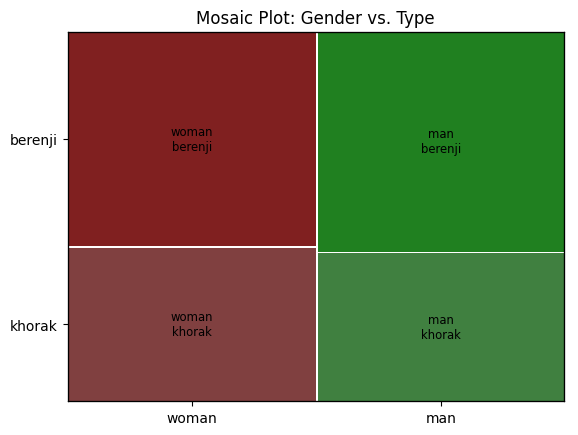

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.graphics.mosaicplot import mosaic
# Create your DataFrame (replace this with your actual data)




# Select only the categorical columns
categorical_columns = ['FoodType','Gender','DayOfWeek']
mosaic(df, ['Gender', 'FoodType'])
plt.title('Mosaic Plot: Gender vs. Type')
plt.show()

